In [ ]:
import torch
import torchtext
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device availble for runing:")
print(device)

Device availble for runing:
cpu


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk("/content/drive/MyDrive/TESS_Dataset"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
1,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
2,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
3,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
4,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral


In [ ]:
df['label'].value_counts()

neutral    400
angry      400
ps         400
sad        400
happy      400
disgust    400
fear       400
Name: label, dtype: int64

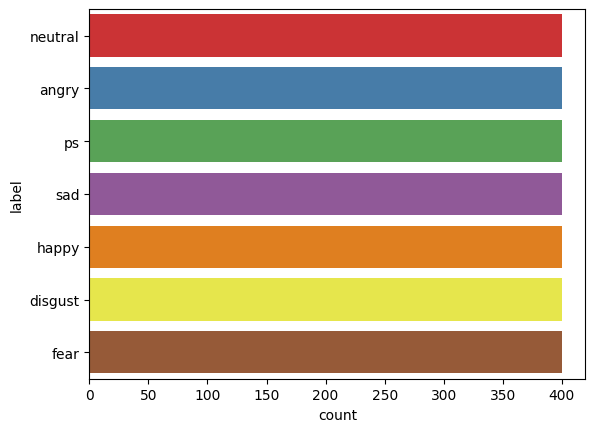

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'label' column
sns.countplot(data=df, y='label', palette='Set1')
plt.show()

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

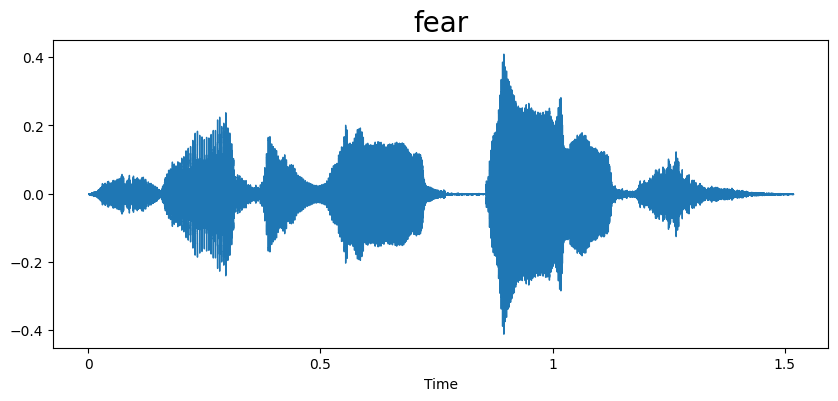

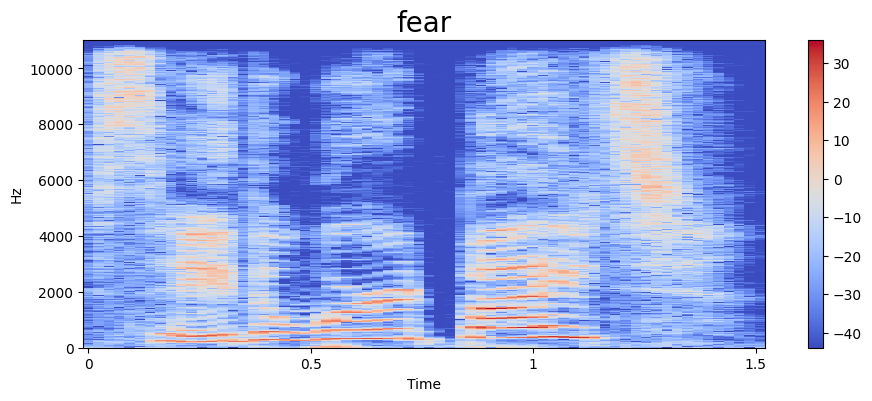

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

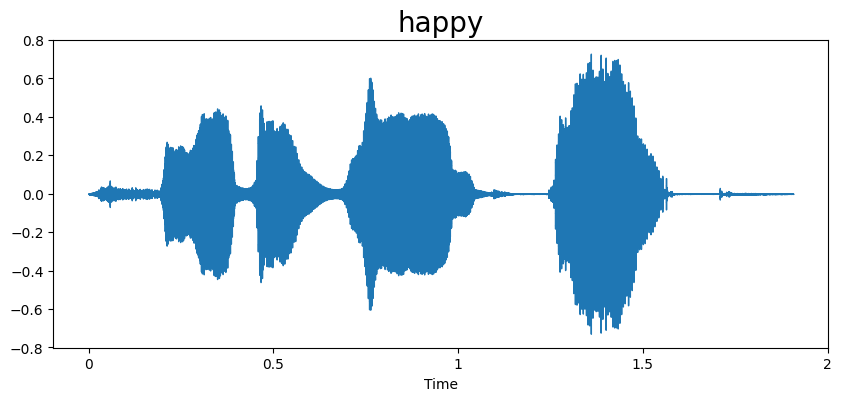

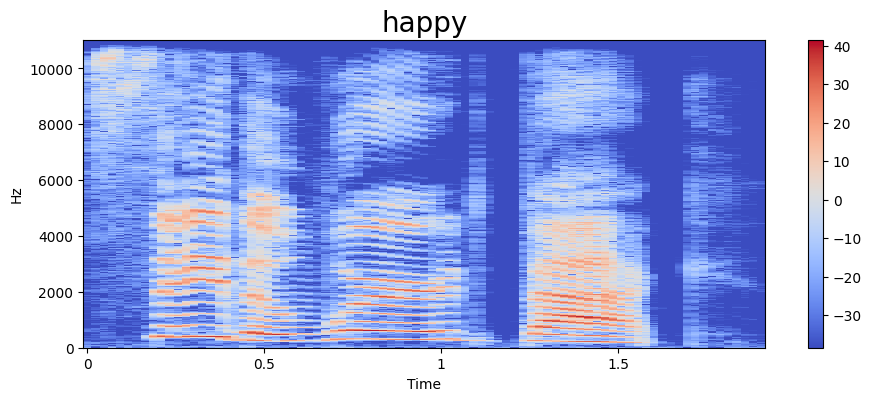

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

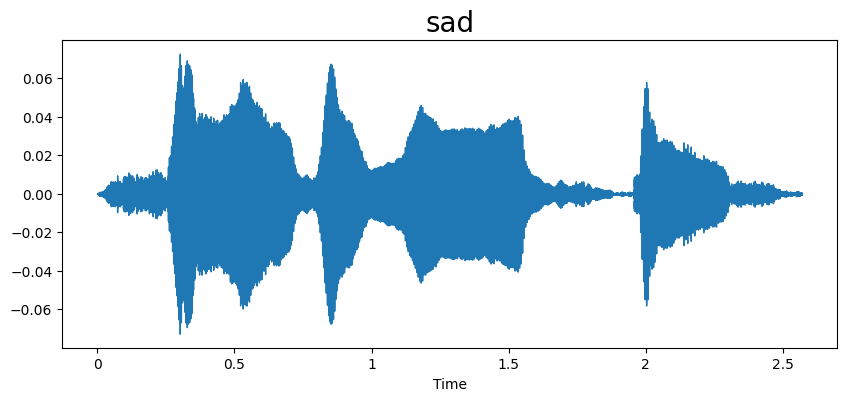

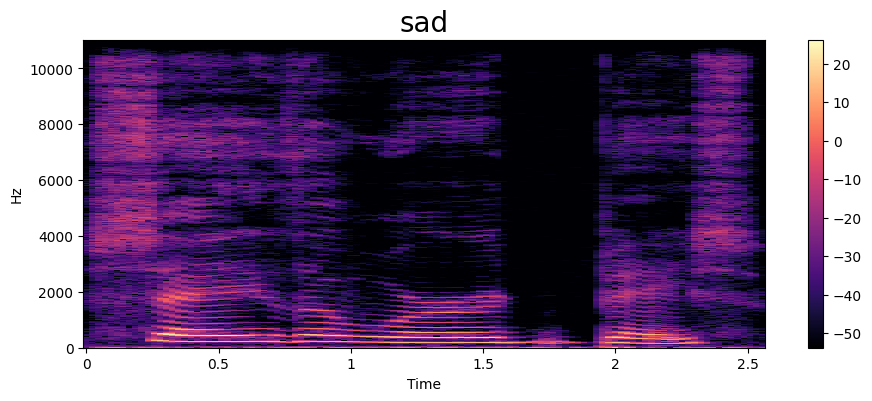

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

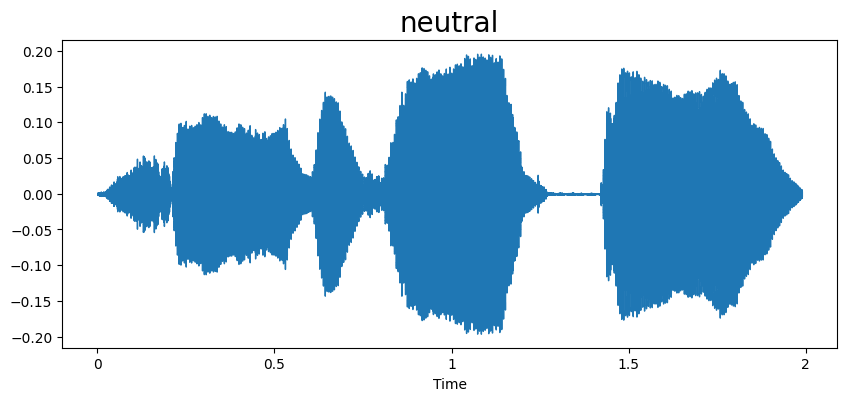

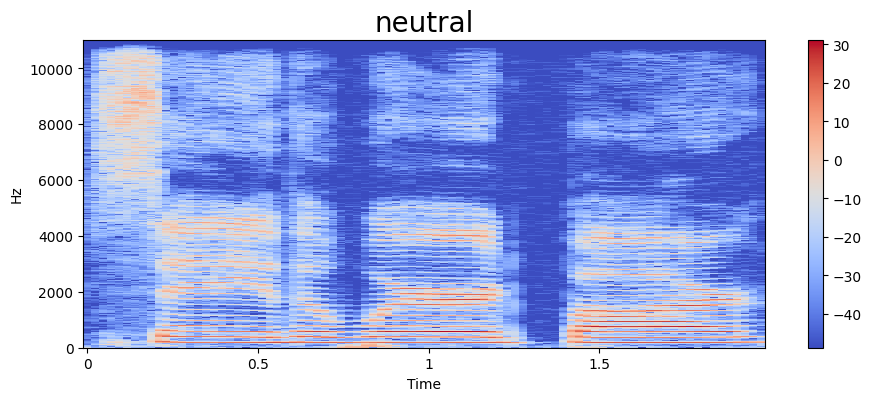

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.71432190e+02,  1.07306229e+02, -2.36984730e+01,  1.29541645e+01,
       -1.64787817e+00, -5.31965399e+00,  7.25560284e+00, -3.12852287e+01,
        6.16591072e+00,  9.43330574e+00, -1.84060764e+01,  1.65350666e+01,
       -1.09875507e+01,  2.52599597e+00, -2.19967079e+00, -3.78029990e+00,
       -3.65167689e+00, -1.45000136e+00, -6.42434931e+00, -8.04687405e+00,
        3.12314779e-01, -6.48154879e+00, -7.25023174e+00, -6.22210324e-01,
       -5.79320240e+00, -5.44561434e+00, -1.85092282e+00, -3.33492088e+00,
       -6.25694132e+00, -4.35016346e+00, -1.70824757e+01, -3.15619016e+00,
       -8.69360828e+00,  1.08489494e+01,  2.35143948e+01,  3.96305580e+01,
        3.89764061e+01,  3.00114079e+01,  9.17850780e+00, -1.97209525e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-371.4322, 107.30623, -23.698473, 12.9541645,...
1       [-394.82037, 52.27196, -0.23424326, 31.694345,...
2       [-493.06287, 98.67417, 20.97822, 21.976233, 3....
3       [-409.94513, 105.649796, -4.5642543, 20.286285...
4       [-393.81622, 91.65329, -18.69992, 12.519554, 4...
                              ...                        
2795    [-464.8119, 70.25582, 10.510636, -12.559635, -...
2796    [-437.882, 86.159096, -5.2926884, -23.754158, ...
2797    [-431.9688, 65.27249, -0.07333605, -14.369298,...
2798    [-413.2932, 81.26914, -5.3418655, -12.67008, -...
2799    [-428.4035, 65.69212, 5.564823, -1.1533774, 2....
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
import tensorflow as tf
# import tensorflow.keras
from tensorflow import keras
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers import rmsprop_v2
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM,Masking,concatenate,AveragePooling1D, BatchNormalization

In [ ]:

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40,1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               6

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 2s 17ms/step - loss: 1.9488 - accuracy: 0.4844 - val_loss: 2.9211 - val_accuracy: 0.2732
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 0.3329 - accuracy: 0.8857 - val_loss: 4.4911 - val_accuracy: 0.3250
Epoch 3/50
35/35 [==============================] - 0s 10ms/step - loss: 0.1293 - accuracy: 0.9585 - val_loss: 4.7273 - val_accuracy: 0.3482
Epoch 4/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0869 - accuracy: 0.9696 - val_loss: 5.9204 - val_accuracy: 0.3196
Epoch 5/50
35/35 [==============================] - 0s 13ms/step - loss: 0.0675 - accuracy: 0.9817 - val_loss: 6.1001 - val_accuracy: 0.3304
Epoch 6/50
35/35 [==============================] - 1s 15ms/step - loss: 0.0438 - accuracy: 0.9839 - val_loss: 6.5039 - val_accuracy: 0.3589
Epoch 7/50
35/35 [==============================] - 1s 15ms/step - loss: 0.0391 - accuracy: 0.9893 - val_loss: 7.0998 - val_accuracy: 0.3196
Epoch 8/50
35/

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X1_train.shape)
print(y1_train.shape)

(2240, 40, 1)
(2240, 7)


In [ ]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import KFold
FOLDS = 5
#folds = 5
kf = KFold(FOLDS)
# print(kf)
# X,y = kf.split(X1_train,y1_train)
# print(X,y)
folds = list(kf.split(X1_train,y1_train))

for i, (train, test) in enumerate(folds):
           X_train_kf =    X1_train[train]
           y_train_kf =    y1_train[train]
           X_test_kf =     X1_train[test]
           y_test_kf =     y1_train[test]
          #  print(X_train_kf,y_train_kf,X_test_kf,y_test_kf)

          #  x_traincnn1_kf = np.expand_dims(X_train_kf, axis=2)
          #  x_traincnn1_kf = X_train_kf
          #  x_testcnn1_kf = np.expand_dims(X_test_kf, axis=2)
          #  x_testcnn1_kf = X_test_kf
          #  x_traincnn1_kf.shape
          #  print(kf)
           history=model.fit(X_train_kf, y_train_kf,
                                batch_size=16,
                                epochs=30,
                                validation_data=(X_test_kf, y_test_kf))

Epoch 1/30
112/112 [==============================] - 1s 5ms/step - loss: 0.3208 - accuracy: 0.9051 - val_loss: 0.0958 - val_accuracy: 0.9866
Epoch 2/30
112/112 [==============================] - 1s 5ms/step - loss: 0.0985 - accuracy: 0.9682 - val_loss: 0.1155 - val_accuracy: 0.9665
Epoch 3/30
112/112 [==============================] - 1s 4ms/step - loss: 0.0580 - accuracy: 0.9810 - val_loss: 0.0140 - val_accuracy: 0.9978
Epoch 4/30
112/112 [==============================] - 1s 5ms/step - loss: 0.0506 - accuracy: 0.9827 - val_loss: 0.0254 - val_accuracy: 0.9888
Epoch 5/30
112/112 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0652 - val_accuracy: 0.9799
Epoch 6/30
112/112 [==============================] - 1s 8ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0087 - val_accuracy: 0.9978
Epoch 7/30
112/112 [==============================] - 1s 8ms/step - loss: 0.0221 - accuracy: 0.9905 - val_loss: 0.0273 - val_accuracy: 0.9911
Epoch 

In [ ]:
print(X_train_kf.shape)
print(y_train_kf.shape)
print(X_test_kf.shape)
print(y_test_kf.shape)

(1792, 40, 1)
(1792, 7)
(448, 40, 1)
(448, 7)


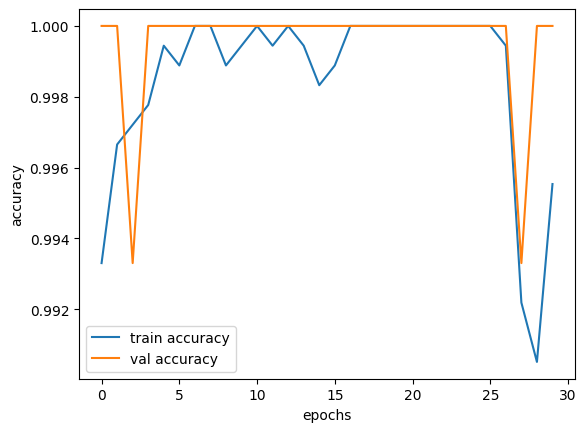

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

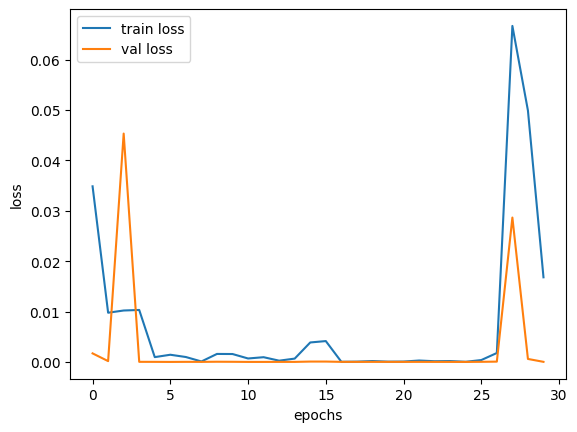

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import KFold
import numpy as np

# Initializing KFold
FOLDS = 5
kf = KFold(n_splits=FOLDS)

# Initializing a list to store accuracy values
test_accuracy_scores = []

# Iterating over folds
for i, (train, test) in enumerate(kf.split(X1_train, y1_train)):
    X_train_kf = X1_train[train]
    y_train_kf = y1_train[train]
    X_test_kf = X1_train[test]
    y_test_kf = y1_train[test]

    # Training the model
    history = model.fit(X_train_kf, y_train_kf,
                        batch_size=16,
                        epochs=30,
                        validation_data=(X_test_kf, y_test_kf))

    # Evaluating the model on test data
    test_loss, test_accuracy = model.evaluate(X1_test, y1_test)
    test_accuracy_scores.append(test_accuracy)

# Printing the mean accuracy over all folds
print("Mean accuracy of the trained model on the test data: {:.2f}%".format(np.mean(test_accuracy_scores) * 100))

Epoch 1/30
112/112 [==============================] - 1s 5ms/step - loss: 3.7037e-05 - accuracy: 1.0000 - val_loss: 1.3305e-09 - val_accuracy: 1.0000
Epoch 2/30
112/112 [==============================] - 1s 5ms/step - loss: 4.9289e-04 - accuracy: 0.9994 - val_loss: 1.3305e-09 - val_accuracy: 1.0000
Epoch 3/30
112/112 [==============================] - 1s 4ms/step - loss: 5.9910e-05 - accuracy: 1.0000 - val_loss: 7.9828e-10 - val_accuracy: 1.0000
Epoch 4/30
112/112 [==============================] - 1s 5ms/step - loss: 3.9381e-06 - accuracy: 1.0000 - val_loss: 7.9828e-10 - val_accuracy: 1.0000
Epoch 5/30
112/112 [==============================] - 0s 4ms/step - loss: 5.5784e-06 - accuracy: 1.0000 - val_loss: 5.3218e-10 - val_accuracy: 1.0000
Epoch 6/30
112/112 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 2.9270e-09 - val_accuracy: 1.0000
Epoch 7/30
112/112 [==============================] - 1s 8ms/step - loss: 0.0012 - accuracy: 0.9994 - va

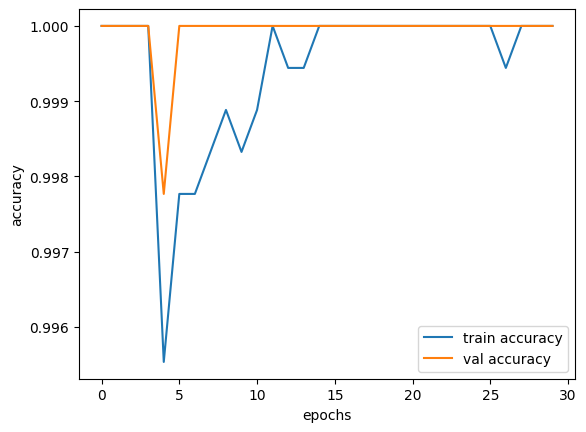

In [ ]:
#Accuracy of model
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

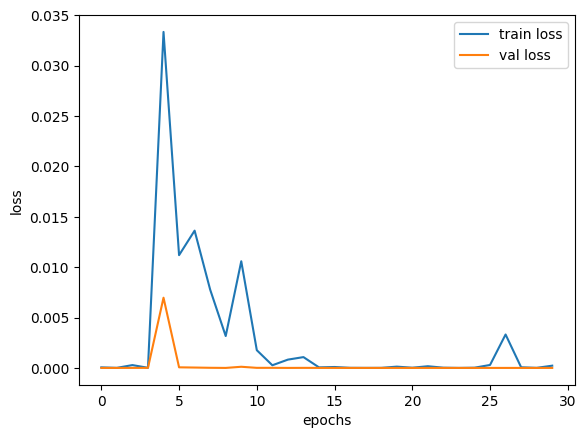

In [ ]:
#Loss of model
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
test_paths = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS_Dataset'):
    for filename in filenames:
        test_path = os.path.dirname(dirname)
        test_paths.append(os.path.join(dirname, filename))

In [ ]:
# adding to dataframe
df_test = pd.DataFrame()
df_test['test_speech'] = test_paths
df_test.head()

,test_speech
0,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...
1,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...
2,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...
3,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...
4,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...


In [ ]:
#extracting feature
extract_mfcc(df_test['test_speech'][0])

array([-3.71432190e+02,  1.07306229e+02, -2.36984730e+01,  1.29541645e+01,
       -1.64787817e+00, -5.31965399e+00,  7.25560284e+00, -3.12852287e+01,
        6.16591072e+00,  9.43330574e+00, -1.84060764e+01,  1.65350666e+01,
       -1.09875507e+01,  2.52599597e+00, -2.19967079e+00, -3.78029990e+00,
       -3.65167689e+00, -1.45000136e+00, -6.42434931e+00, -8.04687405e+00,
        3.12314779e-01, -6.48154879e+00, -7.25023174e+00, -6.22210324e-01,
       -5.79320240e+00, -5.44561434e+00, -1.85092282e+00, -3.33492088e+00,
       -6.25694132e+00, -4.35016346e+00, -1.70824757e+01, -3.15619016e+00,
       -8.69360828e+00,  1.08489494e+01,  2.35143948e+01,  3.96305580e+01,
        3.89764061e+01,  3.00114079e+01,  9.17850780e+00, -1.97209525e+00],
      dtype=float32)

In [ ]:
X_mfcc_test = df_test['test_speech'].apply(lambda x_test: extract_mfcc(x_test))

In [ ]:
X_test = [x_test for x_test in X_mfcc_test]
X_test = np.array(X_test)
X_test.shape

(2800, 40)

In [ ]:
X_test = np.expand_dims(X_test, -1)
X_test.shape

(2800, 40, 1)

In [ ]:
#predicting test data result
predictions = model.predict(X_test, batch_size = 32, verbose = 0)

In [ ]:
for prediction in predictions:
    print(prediction)

Streaming output truncated to the last 5000 lines.
[0.         0.         0.         0.         0.99999994 0.
 0.        ]
[1.3895202e-26 6.2193400e-29 5.5544095e-37 3.4369603e-32 9.9999994e-01
 2.1096358e-26 1.7526707e-32]
[0.         0.         0.         0.         0.99999994 0.
 0.        ]
[1.5219524e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999994e-01
 0.0000000e+00 0.0000000e+00]
[8.7496049e-33 5.4636437e-38 0.0000000e+00 0.0000000e+00 9.9999994e-01
 2.5915679e-37 1.0195444e-37]
[0.         0.         0.         0.         0.99999994 0.
 0.        ]
[2.9706487e-28 2.4351172e-31 2.8125623e-37 1.2707589e-34 9.9999994e-01
 1.5761485e-27 1.1795779e-31]
[6.9072636e-33 1.3328040e-37 0.0000000e+00 0.0000000e+00 9.9999994e-01
 3.5208601e-37 0.0000000e+00]
[1.54829180e-31 1.16608955e-30 0.00000000e+00 5.56675478e-37
 9.99999940e-01 2.43258400e-30 0.00000000e+00]
[1.5035717e-32 1.1271818e-37 0.0000000e+00 0.0000000e+00 9.9999994e-01
 1.6924434e-36 8.7001583e-38]
[0.         0.     